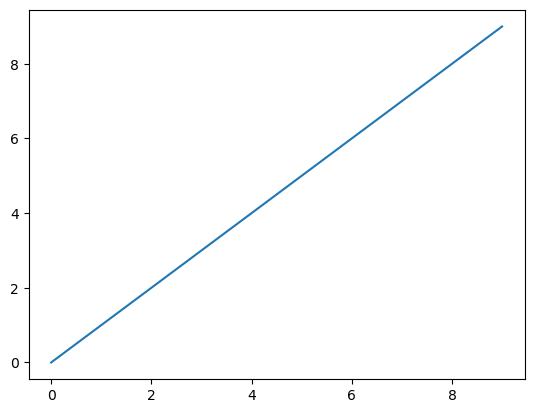

In [1]:
#Credit to Jonah for writing code


#import packages.
#Note that if you get an error when importing saphires that certain packages are not found,
#you'll need to pip install them as well
import numpy as np
import os
from scipy.optimize import curve_fit
import matplotlib
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import pickle as pkl
from scipy.ndimage import gaussian_filter
import scipy
%matplotlib inline
from scipy.integrate import quad
x = [0,1,2,3,4,5,6,7,8,9]
y = x
plt.plot(x, y)    #Testing out matplotlib inline to make sure this runs
print()

In [2]:
#Constants
R_coude = 60000.0 #spectral resolution of the Coude.
c = (2.9979245*10**5) #speed of light

In [81]:
#.dat file extraction, checks .p
star = "BPSCS22950-0027"
folder_path = 'D:\SSGs\stars' + "\\" + star  # Change this to the path of your folder
name = "_coude_head.dat"    
starpath = str(folder_path+"\\"+star+name)    

save_image = False
image_path = r"C:\Users\astro\SSG_Spectra\Images" + "\\" + star + '\\'
print(image_path)



print(starpath)

def is_float(string):
    #True if given string is float else False
    try:
        return float(string)
    except ValueError:
        return False

stardata = []
with open(starpath, 'r') as f:
    d = f.readlines()
    for i in d:
        k = i.rstrip().split(",")
        stardata.append([float(i) if is_float(i) else i for i in k])
stardata = np.array(stardata, dtype='O')

print(stardata)
print(len(stardata))


stardata = np.delete(stardata, [1])
print(stardata)
print(len(stardata))  #only for brute force file removal, in conjunction with above removal
#Need to remove both files to make sure rest of data is fine/lined up - remove from .p array, then remove from .dat array
print() 

C:\Users\astro\SSG_Spectra\Images\BPSCS22950-0027\
D:\SSGs\stars\BPSCS22950-0027\BPSCS22950-0027_coude_head.dat
[list(['#Name', 'Tele', 'DATE-OBS', 'EXPTIME', 'BJD', 'BVCORR'])
 list(['BPSCS22950-0027_2019-10-13_0.pkl', 'mcdonald', '2019-10-13T01:49:44.530', '0', 900.0, 2458769.5784142646, -28.887])
 list(['BPSCS22950-0027_2020-07-12_0.pkl', 'mcdonald', '2020-07-12T08:19:22.371', 1.0, 1089.982, 2459042.8532181643, 6.757])
 list(['BPSCS22950-0027_2020-08-06_0.pkl', 'mcdonald', '2020-08-06T06:45:30.216', 2.0, 1108.812, 2459067.788090351, -5.489])
 list(['BPSCS22950-0027_2020-08-07_0.pkl', 'mcdonald', '2020-08-07T07:36:52.312', 3.0, 1078.803, 2459068.823743169, -6.083])
 list(['BPSCS22950-0027_2020-09-03_0.pkl', 'mcdonald', '2020-09-03T05:49:59.013', 4.0, 1029.046, 2459095.748419986, -18.224])
 list(['BPSCS22950-0027_2020-10-02_0.pkl', 'mcdonald', '2020-10-02T03:12:31.932', 5.0, 1285.883, 2459124.636857824, -27.202])
 list(['BPSCS22950-0027_2020-11-22_0.pkl', 'mcdonald', '2020-11-22T01:05

In [82]:
isExist = os.path.exists(image_path)
print(isExist)
if isExist == False:
    os.mkdir(image_path)
print(os.path.exists(image_path))

True
True


In [83]:
date = []
BJDs = []
for i in range (len(stardata)-1):
    print(stardata[i+1][0])
    temp = str(stardata[i+1]).split("_")
    date.append(temp[1])
    BJDs.append(stardata[i+1][5])

BPSCS22950-0027_2020-07-12_0.pkl
BPSCS22950-0027_2020-08-06_0.pkl
BPSCS22950-0027_2020-08-07_0.pkl
BPSCS22950-0027_2020-09-03_0.pkl
BPSCS22950-0027_2020-10-02_0.pkl
BPSCS22950-0027_2020-11-22_0.pkl
BPSCS22950-0027_2021-07-08_0.pkl
BPSCS22950-0027_2021-07-09_0.pkl
BPSCS22950-0027_2021-08-26_0.pkl
BPSCS22950-0027_2021-08-27_0.pkl
BPSCS22950-0027_2021-10-04_0.pkl


In [84]:
save_image = True

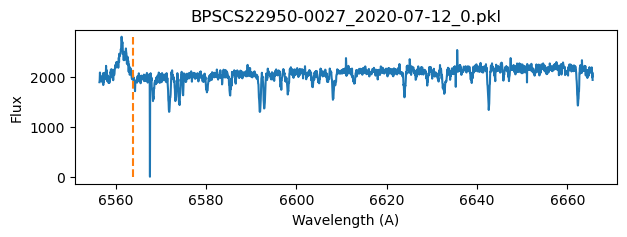

minimum: 1716.2650790763314
maximum: 2808.065749367682
mean 2136.4754549259255
min diff 420.21037584959413
max diff 671.5902944417567
max
inc (array([87], dtype=int64),)
loc 6561


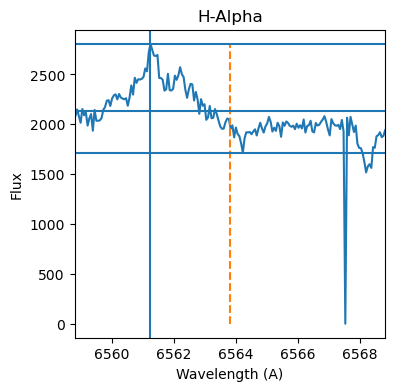

Guess = [2671.5902944417567, 6561, 1, 4136.475454925925]
popt = [5.90275101e+02 6.56142103e+03 1.03544105e+00 1.96641586e+03]
image:  H-alpha_BPSCS22950-0027_2020-07-12.png


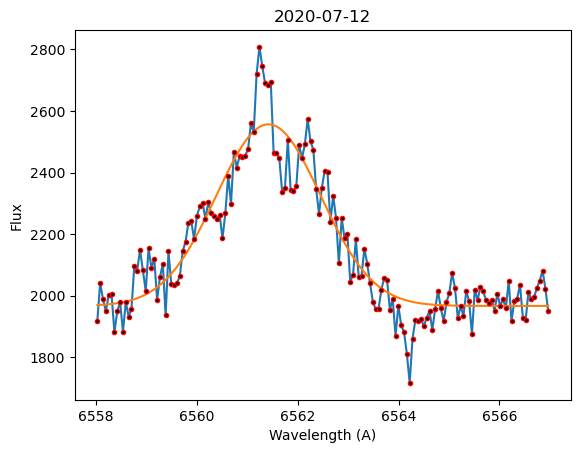

mu_obs = 6561.421025703739
z = -0.00036243857159889417
v = -108.6563473541329
B = 1966.4158605633659
EW_Ha = -0.7374857885195532

--------------------------------------------------------------------------


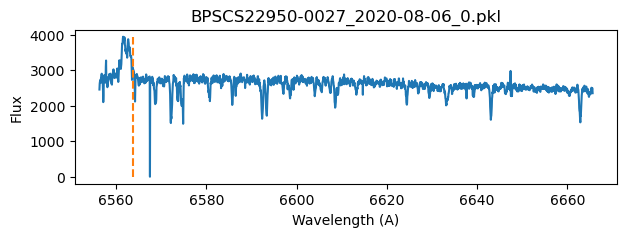

minimum: 2119.997338038918
maximum: 3948.1574536043545
mean 3017.441534855614
min diff 897.4441968166961
max diff 930.7159187487405
max
inc (array([93], dtype=int64),)
loc 6561


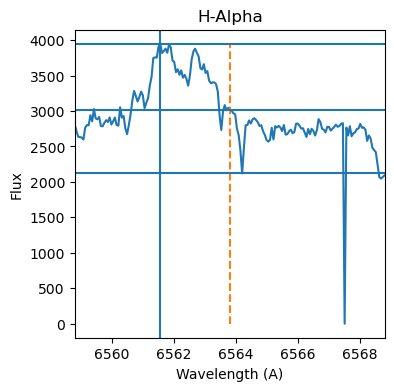

Guess = [2930.7159187487405, 6561, 1, 5017.441534855614]
popt = [1.06652958e+03 6.56210929e+03 9.70354679e-01 2.72916447e+03]
image:  H-alpha_BPSCS22950-0027_2020-08-06.png


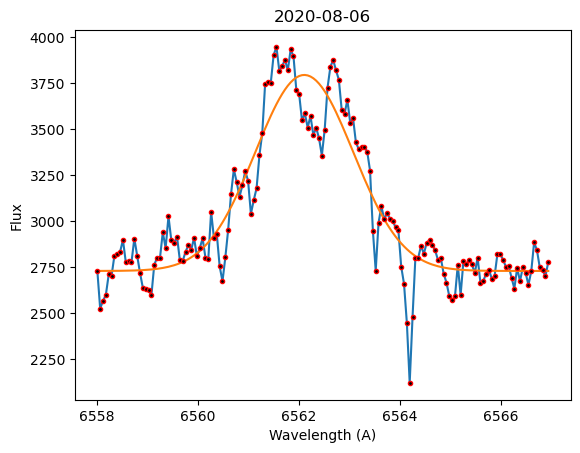

mu_obs = 6562.109291245354
z = -0.0002575807847049025
v = -77.22077451960524
B = 2729.1644656602048
EW_Ha = -0.9131759256473675

--------------------------------------------------------------------------


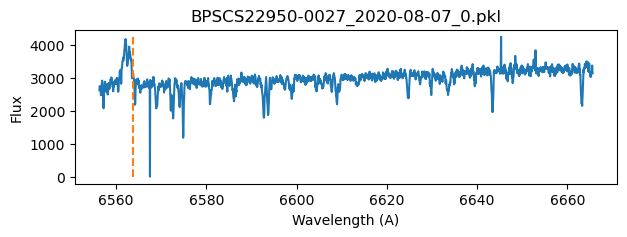

minimum: 2181.0062795249964
maximum: 4173.474068388641
mean 3031.980754179855
min diff 850.9744746548586
max diff 1141.4933142087862
max
inc (array([103], dtype=int64),)
loc 6562


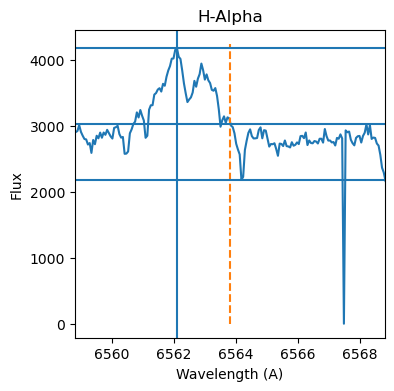

Guess = [3141.493314208786, 6562, 1, 5031.980754179855]
popt = [1.12370336e+03 6.56229029e+03 8.61986881e-01 2.76211642e+03]
image:  H-alpha_BPSCS22950-0027_2020-08-07.png


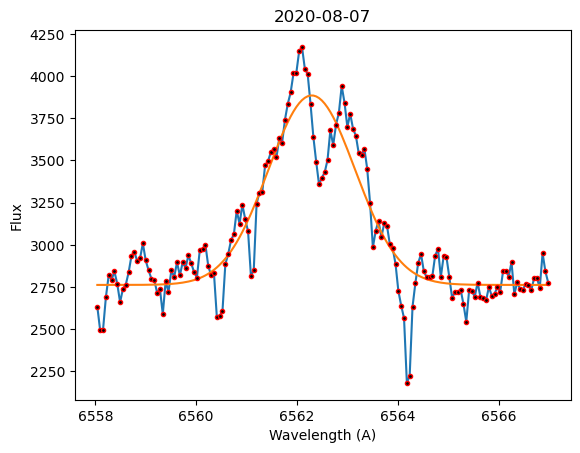

mu_obs = 6562.290288801833
z = -0.00023000566716943987
v = -68.95396247461095
B = 2762.1164242959926
EW_Ha = -0.8611535031513426

--------------------------------------------------------------------------


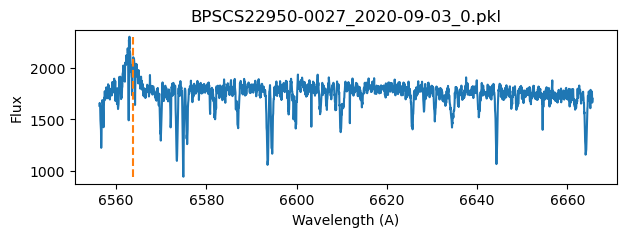

minimum: 1491.7236038328842
maximum: 2302.9476309820643
mean 1871.0802901730572
min diff 379.3566863401729
max diff 431.86734080900715
max
inc (array([118], dtype=int64),)
loc 6562


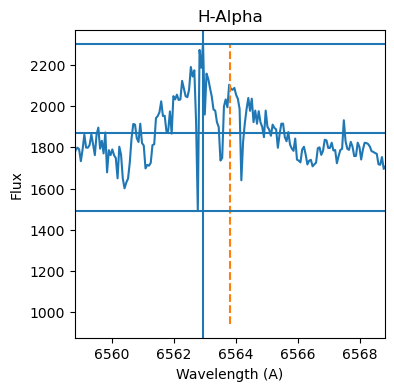

Guess = [2431.867340809007, 6562, 1, 3871.080290173057]
popt = [2.89987671e+02 6.56313541e+03 1.32029011e+00 1.76451172e+03]
image:  H-alpha_BPSCS22950-0027_2020-09-03.png


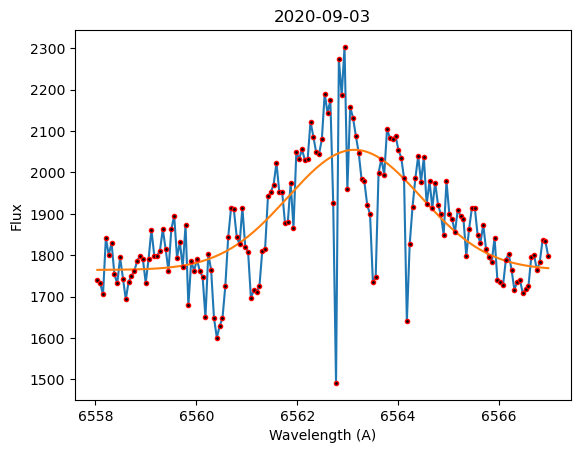

mu_obs = 6563.135406552343
z = -0.00010125132509481595
v = -30.354382815921355
B = 1764.5117247220162
EW_Ha = -0.4732866012718615

--------------------------------------------------------------------------


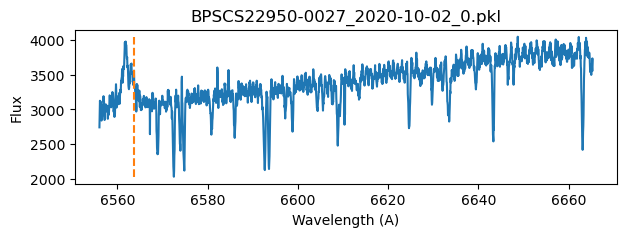

minimum: 2892.901422331711
maximum: 3975.5619264389525
mean 3269.8187785790747
min diff 376.91735624736384
max diff 705.7431478598778
max
inc (array([103], dtype=int64),)
loc 6561


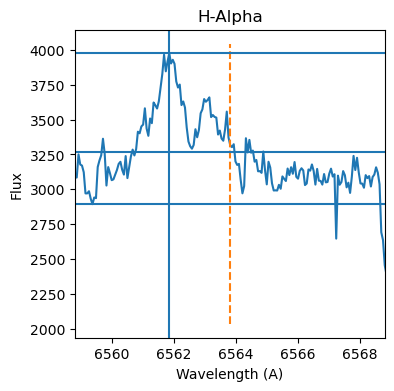

Guess = [2705.743147859878, 6561, 1, 5269.818778579074]
popt = [6.29157265e+02 6.56213590e+03 1.07922044e+00 3.08063869e+03]
image:  H-alpha_BPSCS22950-0027_2020-10-02.png


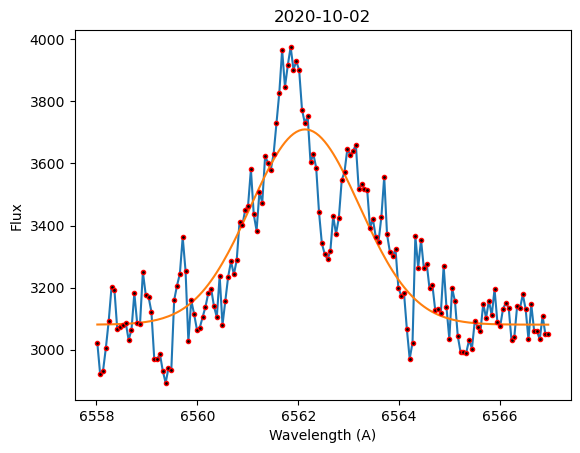

mu_obs = 6562.135895560863
z = -0.0002535275966874662
v = -76.00565935354737
B = 3080.6386903827356
EW_Ha = -0.5172036424128228

--------------------------------------------------------------------------


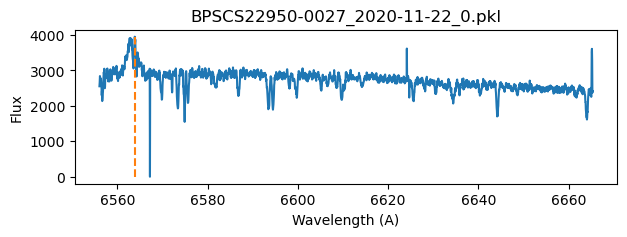

minimum: 2687.9910587711975
maximum: 3949.937811172875
mean 3141.434343916966
min diff 453.44328514576864
max diff 808.5034672559091
max
inc (array([139], dtype=int64),)
loc 6563


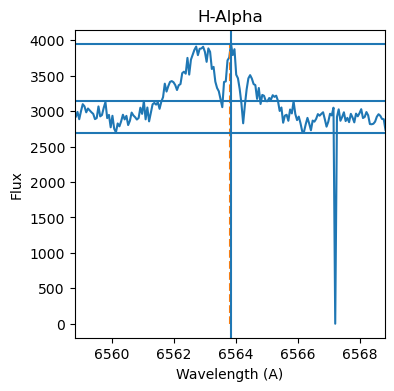

Guess = [2808.503467255909, 6563, 1, 5141.434343916966]
popt = [8.19766882e+02 6.56312420e+03 1.15129024e+00 2.87831109e+03]
image:  H-alpha_BPSCS22950-0027_2020-11-22.png


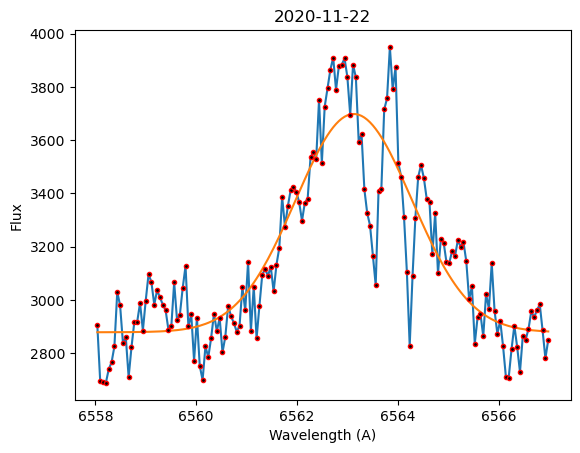

mu_obs = 6563.12420051787
z = -0.00010295857310248025
v = -30.866202878896658
B = 2878.311094105549
EW_Ha = -0.7542269119665503

--------------------------------------------------------------------------


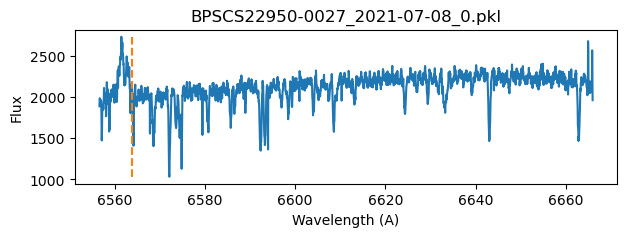

minimum: 1409.5867503300087
maximum: 2729.512160278563
mean 2104.2323871862977
min diff 694.645636856289
max diff 625.2797730922653
min
inc (array([134], dtype=int64),)
loc 6564


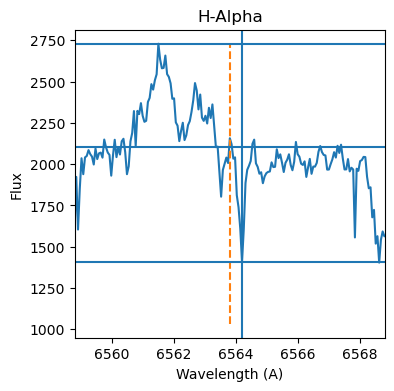

Guess = [2694.645636856289, 6564, 1, 4104.232387186297]
popt = [-2.52863798e+02  6.56498887e+03 -1.02594282e+00  2.17454257e+03]
image:  H-alpha_BPSCS22950-0027_2021-07-08.png


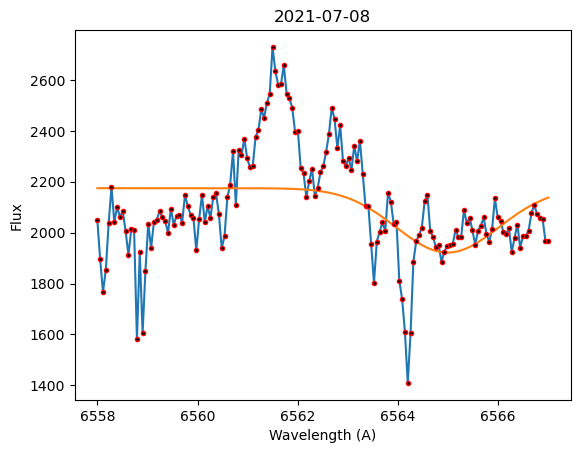

mu_obs = 6564.98887167197
z = 0.0001811255175309328
v = 54.300062658116296
B = 2174.5425661115023
EW_Ha = 0.2837175020129532

--------------------------------------------------------------------------


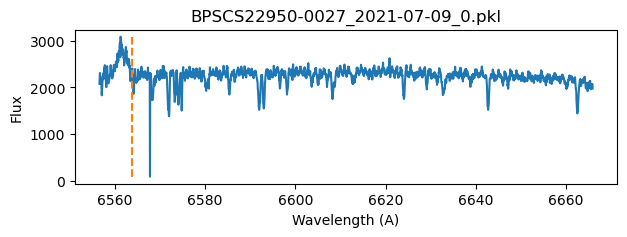

minimum: 1863.987174796987
maximum: 3081.468441427366
mean 2406.032547797293
min diff 542.045373000306
max diff 675.4358936300732
max
inc (array([83], dtype=int64),)
loc 6561


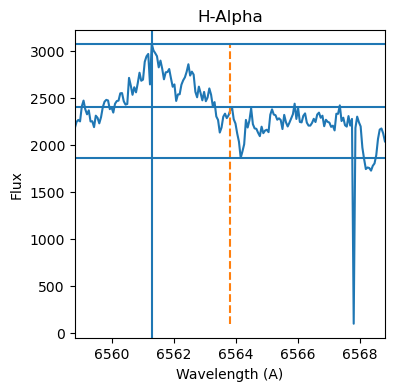

Guess = [2675.435893630073, 6561, 1, 4406.032547797293]
popt = [6.05856679e+02 6.56156548e+03 1.03158829e+00 2.23225156e+03]
image:  H-alpha_BPSCS22950-0027_2021-07-09.png


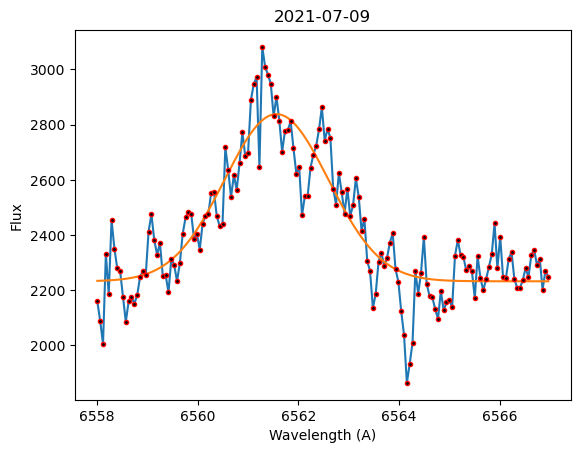

mu_obs = 6561.565478338062
z = -0.0003404311011819119
v = -102.05867387952327
B = 2232.2515608073422
EW_Ha = -0.6649487818551991

--------------------------------------------------------------------------


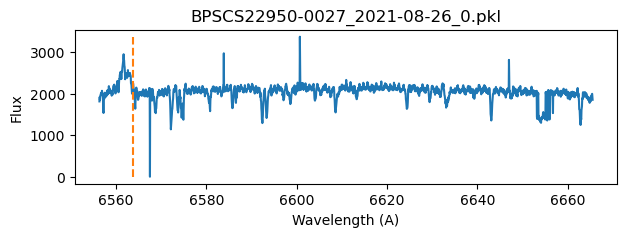

minimum: 1637.9141722253378
maximum: 2949.045446191692
mean 2186.774101002809
min diff 548.8599287774712
max diff 762.2713451888831
max
inc (array([95], dtype=int64),)
loc 6561


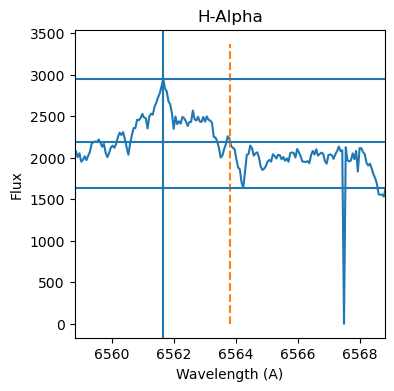

Guess = [2762.271345188883, 6561, 1, 4186.774101002809]
popt = [6.28343814e+02 6.56180039e+03 1.03450716e+00 2.00566738e+03]
image:  H-alpha_BPSCS22950-0027_2021-08-26.png


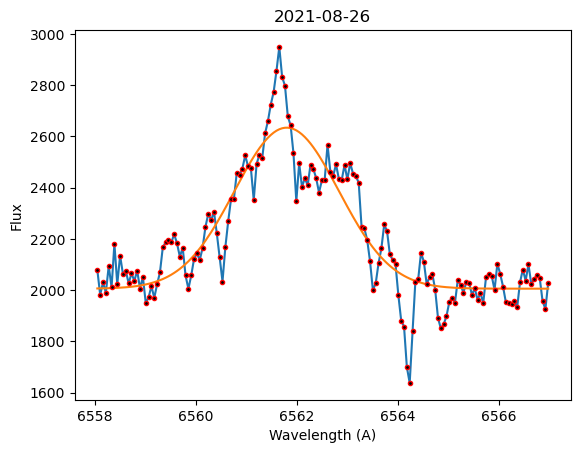

mu_obs = 6561.800392516648
z = -0.00030464174462240163
v = -91.32929499262411
B = 2005.6673750572622
EW_Ha = -0.7691654499955245

--------------------------------------------------------------------------


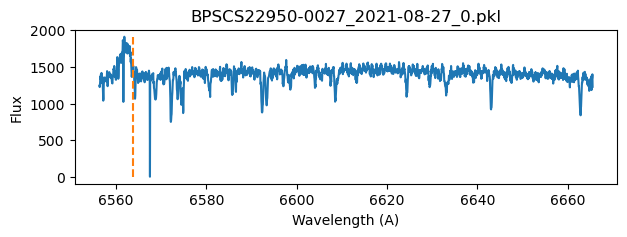

minimum: 1022.5165111144022
maximum: 1912.565062983451
mean 1473.32854799032
min diff 450.8120368759178
max diff 439.2365149931311
min
inc (array([94], dtype=int64),)
loc 6561


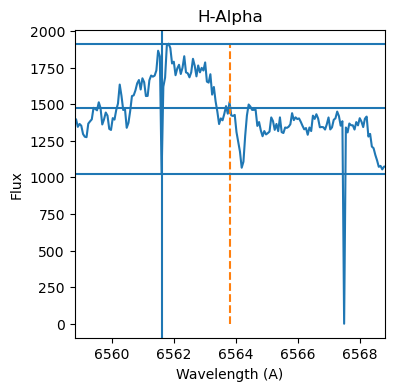

Guess = [2450.812036875918, 6561, 1, 3473.3285479903197]
popt = [4.24448329e+02 6.56203988e+03 9.94777111e-01 1.35566349e+03]
image:  H-alpha_BPSCS22950-0027_2021-08-27.png


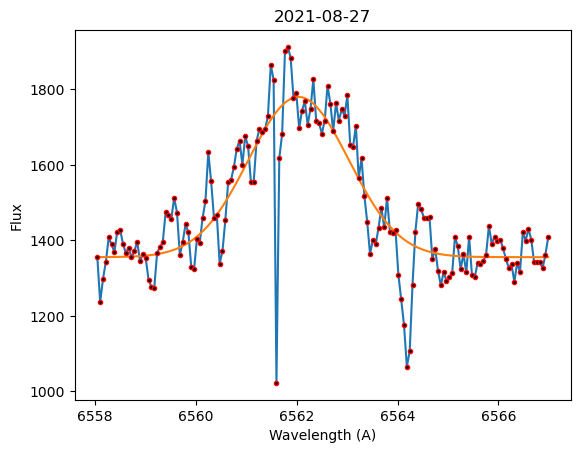

mu_obs = 6562.03988217237
z = -0.00026815531058685263
v = -80.39093754134349
B = 1355.6634926851984
EW_Ha = -0.746061588419944

--------------------------------------------------------------------------


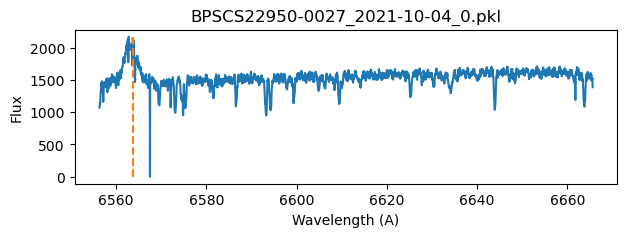

minimum: 1311.15014939171
maximum: 2171.373436200304
mean 1675.93489688833
min diff 364.78474749661996
max diff 495.4385393119737
max
inc (array([115], dtype=int64),)
loc 6562


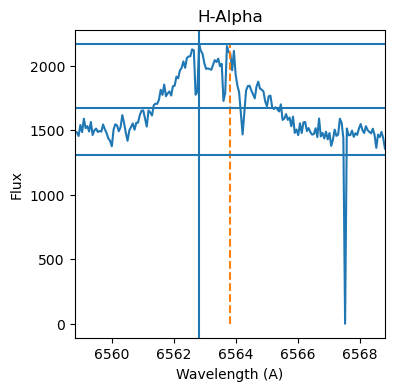

Guess = [2495.4385393119737, 6562, 1, 3675.93489688833]
popt = [5.70292668e+02 6.56314256e+03 1.40433479e+00 1.45334536e+03]
image:  H-alpha_BPSCS22950-0027_2021-10-04.png


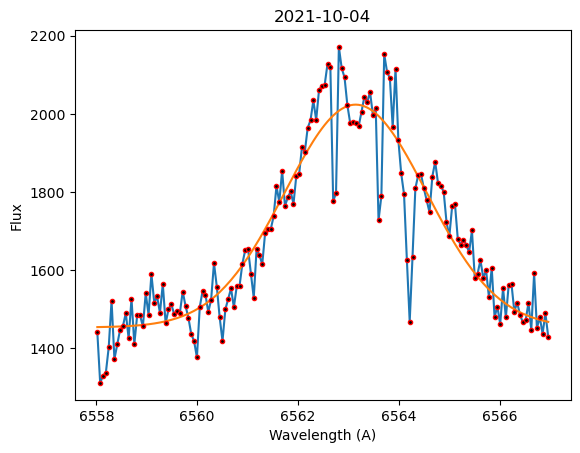

mu_obs = 6563.142560996643
z = -0.00010016133997950384
v = -30.027613507738405
B = 1453.3453582741413
EW_Ha = -1.1680319244093118

--------------------------------------------------------------------------


In [86]:
p0g = [[3000, 6561.5, 2, 4000],
       [1500, 6562.5, 2, 2000],
       [1200, 6562.5, 2.5, 1500],
       [1200, 6561.5, 2, 1400]]


lims = [6558, 6567] #normal (6558, 6566)

EWs = [] #[] for i in range (len(stardata)-1)]
Z = []#[] for i in range (len(stardata)-1)]
RV = []#[] for i in range (len(stardata)-1)]

for k in range (len(stardata)-1):
    #print(folder_path+"/"+stardata[i+1][0])

    spec = pkl.load(open(folder_path+"/"+stardata[k+1][0], 'rb'))
    '''print(spec['wav'].shape)
    for i in range(spec['wav'].shape[0]):
        print(i,spec['wav'][i,0],spec['wav'][i,-1])'''
    o_ha = 39
    l_ha= 6563.8
    fig,ax = plt.subplots(figsize = (7,2))
    ax.plot(spec['wav'][o_ha],spec['flux'][o_ha])
    ax.plot([l_ha, l_ha], (min(spec['flux'][o_ha]), max(spec['flux'][o_ha])), '--')
    ax.set_ylabel('Flux')
    ax.set_xlabel('Wavelength (A)')
    ax.set_title(stardata[k+1][0])
    plt.show()

    Ha_where = np.where((spec['wav'][o_ha]>lims[0]) & (spec['wav'][o_ha]<lims[1]))

#####################

    #print(Ha_where)
    mini = min(spec['flux'][o_ha][Ha_where])
    maxi = max(spec['flux'][o_ha][Ha_where])
    print("minimum:", mini)
    print("maximum:", maxi)


    
    meanf = np.mean(spec['flux'][o_ha][Ha_where])
    print("mean", meanf)
    
    print("min diff", np.abs(meanf - mini))
    print("max diff", np.abs(meanf- maxi))
    if (np.abs(mini-meanf)) > (np.abs(maxi-meanf)):
        amp = np.abs(mini-meanf)
        inc = np.where(spec['flux'][o_ha] == mini)
        print("min")
    else:
        amp = np.abs(maxi-meanf)
        inc = np.where(spec['flux'][o_ha] == maxi)
        print("max")
  
    print("inc", inc)
    loc = int(spec['wav'][o_ha][inc].item())
    print("loc", loc)
    
    correction = 2000 #250
    
    pog = [amp + correction, loc, 1, meanf + correction]


  
    #plot Image
    
    fig,ax = plt.subplots(figsize = (4,4))
    ax.plot(spec['wav'][o_ha],spec['flux'][o_ha])
    ax.set_ylabel('Flux')
    ax.set_xlabel('Wavelength (A)')
    ax.plot([l_ha, l_ha], (min(spec['flux'][o_ha]), max(spec['flux'][o_ha])), '--')
    ax.set_xlim(l_ha-5, l_ha+5)

    ax.axvline(spec['wav'][o_ha][inc])
    ax.axhline(meanf)
    ax.axhline(mini)
    ax.axhline(maxi)
    
    ax.set_title("H-Alpha")
    plt.show()
        
    #Save Image
    def gauss(x, *p):
        A, mu, sigma, B = p
        return  A * np.exp(-((x-mu)**2) /(2 * sigma**2)) + B
        
    
    #select wavelength range of ~6559 A to ~6565 A
    #pguess = [200, 6563, 2, 1750]
    pguess = pog
    print("Guess =", pguess)
    popt, pcov = curve_fit(gauss, spec['wav'][o_ha][Ha_where], spec['flux'][o_ha][Ha_where], p0 = pguess) #,maxfev=5000)

    print("popt =", popt)
    
    #Manual adjust lim
    
    plt.plot(spec['wav'][o_ha][Ha_where], spec['flux'][o_ha][Ha_where])
    plt.plot(spec['wav'][o_ha][Ha_where], gauss(spec['wav'][o_ha][Ha_where], *popt))
    plt.plot(spec['wav'][o_ha][Ha_where], spec['flux'][o_ha][Ha_where], 'ko', ms = 3, mec = 'r')
    plt.ylabel("Flux")
    plt.xlabel("Wavelength (A)")
    #plt.xlim(6560, 6564.5)
    #plt.ylim(1400, 2200)
    plt.title(date[k])
    if save_image == True:
        imageName = 'H-alpha_' + star + '_'+ str(date[k]) + '.png'
        print('image: ', imageName)
        plt.savefig(image_path + imageName)
    plt.show()

    
    print("mu_obs =", popt[1])
    mu_obs = popt[1]
    mu_emit = 6563.8

    z = (mu_obs - mu_emit)/(mu_emit)

    print("z =", z)
    v = z * c
    print("v =", v)
    print("B =", popt[3])
    
    upperlam = mu_obs+2
    lowerlam = mu_obs-2


    
    IntHa = quad(gauss, lowerlam, upperlam, args = (popt[0], popt[1], popt[2],popt[3]))
    B = popt[3]
    Int1 = (upperlam - lowerlam)
    Int2 = IntHa[0]/B
    IntHA = Int1-Int2

    print("EW_Ha =",  IntHA)
    '''EWs[k].extend([IntHA])
    Z[k].extend([z])
    RV[k].extend([v])'''
    
    EWs.append(IntHA)
    Z.append(z)
    RV.append(v)
    print()
    print("--------------------------------------------------------------------------")

In [87]:
for i in range (len(EWs)):
    print(EWs[i])
print("Mean:", np.mean(EWs))

-0.7374857885195532
-0.9131759256473675
-0.8611535031513426
-0.4732866012718615
-0.5172036424128228
-0.7542269119665503
0.2837175020129532
-0.6649487818551991
-0.7691654499955245
-0.746061588419944
-1.1680319244093118
Mean: -0.6655475105124112


In [88]:
for i in range(len(EWs)):
    f = open("Ha_EW_stars.txt", "a") 
    print(star, date[i], EWs[i], Z[i], RV[i], BJDs[i], file=f)
    f.close()